# Project 2: Cardiovascular Disease Dataset

### Part 3 - Data Modeling

#### Author: Amin
For this notebook, I will be training our models for the finalized dataset
<hr>

## 1. Importing our libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, roc_curve, auc

# Algorithmns models to be compared
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 2. Getting our Data

In [2]:
df = pd.read_csv('finalized_data.csv')
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_over,bmi_under,systolic_low,systolic_normal,diastolic_normal
0,3,1,168,62.0,1,1,0,0,1,0,22.0,0,0,0,1,0
1,3,0,156,85.0,3,1,0,0,1,1,34.9,1,0,0,0,0
2,3,0,165,64.0,3,1,0,0,0,1,23.5,0,0,0,0,1
3,2,1,169,82.0,1,1,0,0,1,1,28.7,1,0,0,0,0
4,4,0,151,67.0,2,2,0,0,0,0,29.4,1,0,0,1,0


## 3. Modeling & Testing

### 3.1 Splitting out Data

In [3]:
X = df.drop(['cardio', 'bmi', 'height', 'weight'], axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

### 3.2 Logistic Regression

In [4]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [5]:
# Score of our model
lr_train = round(lr.score(X_train, y_train)*100, 2)
lr_test = round(lr.score(X_test, y_test)*100, 2)

print("Train Score: " + str(lr_train))
print("Test Score: " + str(lr_test))

# Accuracy, recall & f1-scores
y_pred_lr = lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test,y_pred_lr), 2)
lr_recall = round(recall_score(y_test,y_pred_lr), 2)
lr_f1 = round(f1_score(y_test,y_pred_lr), 2)

print("Accuracy Score: " + str(lr_accuracy))
print("Recall Score: " + str(lr_recall))
print("f1 Score: " + str(lr_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
lr_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(lr_roc_auc))

Train Score: 71.94
Test Score: 72.39
Accuracy Score: 0.72
Recall Score: 0.67
f1 Score: 0.71
ROC AUC: 0.7232951179618012


In [6]:
y_pred_lr = lr.predict(X_test)

print(accuracy_score(y_test,y_pred_lr))
print("\n")
print(confusion_matrix(y_test, y_pred_lr))

0.7238672573249397


[[5048 1455]
 [2098 4266]]


In [7]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6503
           1       0.75      0.67      0.71      6364

    accuracy                           0.72     12867
   macro avg       0.73      0.72      0.72     12867
weighted avg       0.73      0.72      0.72     12867



### 3.3 SVM

In [8]:
%%time

svc = SVC(random_state=1)
svc.fit(X_train, y_train)

CPU times: total: 2min 55s
Wall time: 2min 58s


SVC(random_state=1)

In [9]:
%%time

# Score of our model
svc_train = round(svc.score(X_train, y_train)*100, 2)
svc_test = round(svc.score(X_test, y_test)*100, 2)

print("Train Score: " + str(svc_train))
print("Test Score: " + str(svc_test))

# Accuracy, recall & f1-scores
y_pred_svc = svc.predict(X_test)
svc_accuracy = round(accuracy_score(y_test,y_pred_svc), 2)
svc_recall = round(recall_score(y_test,y_pred_svc), 2)
svc_f1 = round(f1_score(y_test,y_pred_svc), 2)

print("Accuracy Score: " + str(svc_accuracy))
print("Recall Score: " + str(svc_recall))
print("f1 Score: " + str(svc_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
svc_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(svc_roc_auc))

Train Score: 71.91
Test Score: 72.53
Accuracy Score: 0.73
Recall Score: 0.67
f1 Score: 0.71
ROC AUC: 0.7247895691520996
CPU times: total: 4min 54s
Wall time: 5min 5s


In [10]:
y_pred_svc = svc.predict(X_test)

print(accuracy_score(y_test,y_pred_svc))
print("\n")
print(confusion_matrix(y_test, y_pred_svc))

0.7253439030076941


[[5047 1456]
 [2078 4286]]


In [11]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6503
           1       0.75      0.67      0.71      6364

    accuracy                           0.73     12867
   macro avg       0.73      0.72      0.72     12867
weighted avg       0.73      0.73      0.72     12867



### 3.4 K-Nearest Neighbours

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Score of our model
knn_train = round(knn.score(X_train, y_train)*100, 2)
knn_test = round(knn.score(X_test, y_test)*100, 2)

print("Train Score: " + str(knn_train))
print("Test Score: " + str(knn_test))

# Accuracy, recall & f1-scores
y_pred_knn = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test,y_pred_knn), 2)
knn_recall = round(recall_score(y_test,y_pred_knn), 2)
knn_f1 = round(f1_score(y_test,y_pred_knn), 2)

print("Accuracy Score: " + str(knn_accuracy))
print("Recall Score: " + str(knn_recall))
print("f1 Score: " + str(knn_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
knn_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(knn_roc_auc))

Train Score: 68.2
Test Score: 66.96
Accuracy Score: 0.67
Recall Score: 0.74
f1 Score: 0.69
ROC AUC: 0.6703211509110575


In [14]:
y_pred_knn = knn.predict(X_test)

print(accuracy_score(y_test,y_pred_knn))
print("\n")
print(confusion_matrix(y_test, y_pred_knn))

0.6696199580321753


[[3937 2566]
 [1685 4679]]


In [15]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65      6503
           1       0.65      0.74      0.69      6364

    accuracy                           0.67     12867
   macro avg       0.67      0.67      0.67     12867
weighted avg       0.67      0.67      0.67     12867



### 3.5 Decision Tree

In [16]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
# Score of our model
dt_train = round(dt.score(X_train, y_train)*100, 2)
dt_test = round(dt.score(X_test, y_test)*100, 2)

print("Train Score: " + str(dt_train))
print("Test Score: " + str(dt_test))

# Accuracy, recall & f1-scores
y_pred_dt = dt.predict(X_test)
dt_accuracy = round(accuracy_score(y_test,y_pred_dt), 2)
dt_recall = round(recall_score(y_test,y_pred_dt), 2)
dt_f1 = round(f1_score(y_test,y_pred_dt), 2)

print("Accuracy Score: " + str(dt_accuracy))
print("Recall Score: " + str(dt_recall))
print("f1 Score: " + str(dt_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
dt_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(dt_roc_auc))

Train Score: 73.23
Test Score: 72.07
Accuracy Score: 0.72
Recall Score: 0.7
f1 Score: 0.71
ROC AUC: 0.7205021073772169


In [18]:
y_pred_dt = dt.predict(X_test)

print(accuracy_score(y_test,y_pred_dt))
print("\n")
print(confusion_matrix(y_test, y_pred_dt))

0.7206808113779436


[[4793 1710]
 [1884 4480]]


In [19]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6503
           1       0.72      0.70      0.71      6364

    accuracy                           0.72     12867
   macro avg       0.72      0.72      0.72     12867
weighted avg       0.72      0.72      0.72     12867



### 3.6 Random Forest

In [20]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [21]:
# Score of our model
rf_train = round(rf.score(X_train, y_train)*100, 2)
rf_test = round(rf.score(X_test, y_test)*100, 2)

print("Train Score: " + str(rf_train))
print("Test Score: " + str(rf_test))

# Accuracy, recall & f1-scores
y_pred_rf = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred_rf), 2)
rf_recall = round(recall_score(y_test,y_pred_rf), 2)
rf_f1 = round(f1_score(y_test,y_pred_rf), 2)

print("Accuracy Score: " + str(rf_accuracy))
print("Recall Score: " + str(rf_recall))
print("f1 Score: " + str(rf_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
rf_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(rf_roc_auc))

Train Score: 73.23
Test Score: 72.16
Accuracy Score: 0.72
Recall Score: 0.71
f1 Score: 0.72
ROC AUC: 0.7214936117575865


In [22]:
y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))
print("\n")
print(confusion_matrix(y_test, y_pred_rf))

0.7216134297038936


[[4764 1739]
 [1843 4521]]


In [23]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      6503
           1       0.72      0.71      0.72      6364

    accuracy                           0.72     12867
   macro avg       0.72      0.72      0.72     12867
weighted avg       0.72      0.72      0.72     12867



### 3.7 XGBoost

In [24]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
# Score of our model
xgb_train = round(xgb.score(X_train, y_train)*100, 2)
xgb_test = round(xgb.score(X_test, y_test)*100, 2)

print("Train Score: " + str(xgb_train))
print("Test Score: " + str(xgb_test))

# Accuracy, recall & f1-scores
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = round(accuracy_score(y_test,y_pred_xgb), 2)
xgb_recall = round(recall_score(y_test,y_pred_xgb), 2)
xgb_f1 = round(f1_score(y_test,y_pred_xgb), 2)

print("Accuracy Score: " + str(xgb_accuracy))
print("Recall Score: " + str(xgb_recall))
print("f1 Score: " + str(xgb_f1))

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
xgb_roc_auc = auc(fpr, tpr)
print("ROC AUC: " + str(xgb_roc_auc))

Train Score: 72.82
Test Score: 72.36
Accuracy Score: 0.72
Recall Score: 0.72
f1 Score: 0.72
ROC AUC: 0.7234880135097924


In [26]:
y_pred_xgb = xgb.predict(X_test)

print(accuracy_score(y_test,y_pred_xgb))
print("\n")
print(confusion_matrix(y_test, y_pred_xgb))

0.7235563845496231


[[4746 1757]
 [1800 4564]]


In [27]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6503
           1       0.72      0.72      0.72      6364

    accuracy                           0.72     12867
   macro avg       0.72      0.72      0.72     12867
weighted avg       0.72      0.72      0.72     12867



## 4. Results of Initial Model

In [28]:
model_data = pd.DataFrame({'Model':['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 
                          'Train Score':[lr_train, svc_train, knn_train, dt_train, rf_train, xgb_train], 
                          'Test Score':[lr_test, svc_test, knn_test, dt_test, rf_test, xgb_test], 
                                'Recall':[lr_recall, svc_recall, knn_recall, dt_recall, rf_recall, xgb_recall],
                                'f1-score':[lr_f1, svc_f1, knn_f1, dt_f1, rf_f1, xgb_f1], 
                                'ROC AUC':[lr_roc_auc, svc_roc_auc, knn_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc]})

model_data

,Model,Train Score,Test Score,Recall,f1-score,ROC AUC
0,Logistic Regression,71.94,72.39,0.67,0.71,0.723295
1,SVM,71.91,72.53,0.67,0.71,0.724790
2,KNN,68.20,66.96,0.74,0.69,0.670321
3,Decision Tree,73.23,72.07,0.70,0.71,0.720502
4,Random Forest,73.23,72.16,0.71,0.72,0.721494
5,XGBoost,72.82,72.36,0.72,0.72,0.723488


### Observations: 

1) <strong>SVC</strong> performed the best out of all our models having a score of 72.5  

2) Every model performed relatively the same, getting similar results.  

3) For the next steps, I will be tuning Logistic Regression, SVM, Random Forest & XGBoost.  

## 5. Hyperparameter Tuning  

### 5.1 Logistic Regression

In [29]:
%%time
lr_grid = {"C":[1, 10, 100, 1000], "penalty":["l1", "l2"]}

gs_lr = GridSearchCV(lr, lr_grid, cv = 10, verbose = 1, n_jobs = -1)
gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.cv_results_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.7193209157191323
{'mean_fit_time': array([0.0121994 , 0.43364513, 0.01050198, 0.47013628, 0.01164403,
       0.49600406, 0.01570547, 0.48242021]), 'std_fit_time': array([0.00442877, 0.07693861, 0.0016862 , 0.06318158, 0.00296685,
       0.09852543, 0.00966479, 0.10305354]), 'mean_score_time': array([0.        , 0.00479691, 0.        , 0.00479629, 0.        ,
       0.0065949 , 0.        , 0.00369885]), 'std_score_time': array([0.        , 0.0030896 , 0.        , 0.00312241, 0.        ,
       0.00589941, 0.        , 0.00077892]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object

In [30]:
lr_optimal = gs_lr.best_params_
lr_optimal

{'C': 1, 'penalty': 'l2'}

In [31]:
# Score of our model
lr_train = round(gs_lr.score(X_train, y_train)*100, 2)
lr_test = round(gs_lr.score(X_test, y_test)*100, 2)

print("Train Score: " + str(lr_train))
print("Test Score: " + str(lr_test))

# Accuracy, recall & f1-scores
y_pred_lr = gs_lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test,y_pred_lr), 2)
lr_recall = round(recall_score(y_test,y_pred_lr), 2)
lr_f1 = round(f1_score(y_test,y_pred_lr), 2)

print("Accuracy Score: " + str(lr_accuracy))
print("Recall Score: " + str(lr_recall))
print("f1 Score: " + str(lr_f1))

Train Score: 71.94
Test Score: 72.39
Accuracy Score: 0.72
Recall Score: 0.67
f1 Score: 0.71


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6503
           1       0.75      0.67      0.71      6364

    accuracy                           0.72     12867
   macro avg       0.73      0.72      0.72     12867
weighted avg       0.73      0.72      0.72     12867



Text(33.0, 0.5, 'Actual')

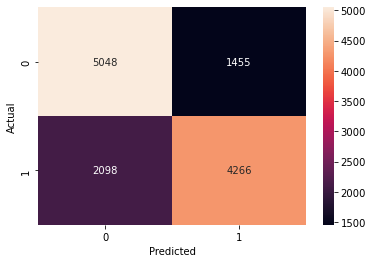

In [32]:
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

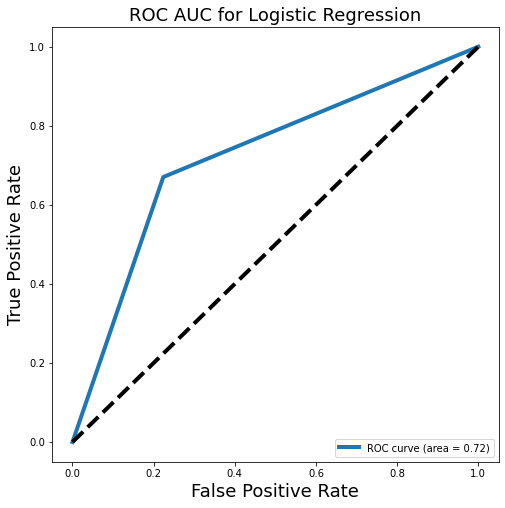

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
lr_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % lr_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for Logistic Regression', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.2 SVM

In [34]:
%%time

svc_grid = {'C':[0.1, 1, 10, 100],'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['linear','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_grid, cv=5, verbose=1, n_jobs=-1)
rs_svc.fit(X_train, y_train)

print(rs_svc.best_score_)
print(rs_svc.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7163286032064097
{'mean_fit_time': array([168.5510416 ,  92.27147164, 161.14256659, 177.65137825,
       190.90037165, 339.88665552, 134.1673593 , 129.97380862,
        76.26773982,  73.29021597]), 'std_fit_time': array([ 2.19212103,  3.11762073,  3.60069074, 10.0871146 ,  6.64361727,
       25.20174516,  4.23506564,  9.38437857,  3.72700026,  7.16355115]), 'mean_score_time': array([38.17519398, 11.13235106, 42.34955082, 11.24037528, 11.0755074 ,
       39.09899888, 36.96805162, 37.2233705 ,  8.35946016,  8.12614803]), 'std_score_time': array([0.84898132, 0.44615172, 1.97929428, 0.66265548, 0.38523302,
       0.90199178, 1.96541904, 2.41821173, 0.18158111, 0.45789518]), 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'linear', 'rbf',
                   'rbf', 'rbf', 'linear', 'linear'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fi

In [35]:
svc_optimal = rs_svc.best_params_
svc_optimal

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [36]:
# Score of our model
svc_train = round(rs_svc.score(X_train, y_train)*100, 2)
svc_test = round(rs_svc.score(X_test, y_test)*100, 2)

print("Train Score: " + str(svc_train))
print("Test Score: " + str(svc_test))

# Accuracy, recall & f1-scores
y_pred_svc = rs_svc.predict(X_test)
svc_accuracy = round(accuracy_score(y_test,y_pred_svc), 2)
svc_recall = round(recall_score(y_test,y_pred_svc), 2)
svc_f1 = round(f1_score(y_test,y_pred_svc), 2)

print("Accuracy Score: " + str(svc_accuracy))
print("Recall Score: " + str(svc_recall))
print("f1 Score: " + str(svc_f1))

Train Score: 73.23
Test Score: 72.32
Accuracy Score: 0.72
Recall Score: 0.71
f1 Score: 0.72


              precision    recall  f1-score   support

           0       0.72      0.73      0.73      6503
           1       0.72      0.71      0.72      6364

    accuracy                           0.72     12867
   macro avg       0.72      0.72      0.72     12867
weighted avg       0.72      0.72      0.72     12867



Text(33.0, 0.5, 'Actual')

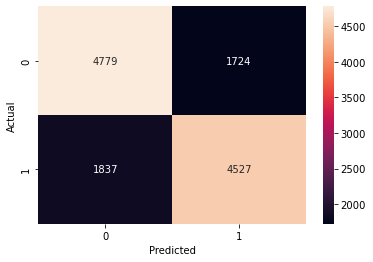

In [37]:
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

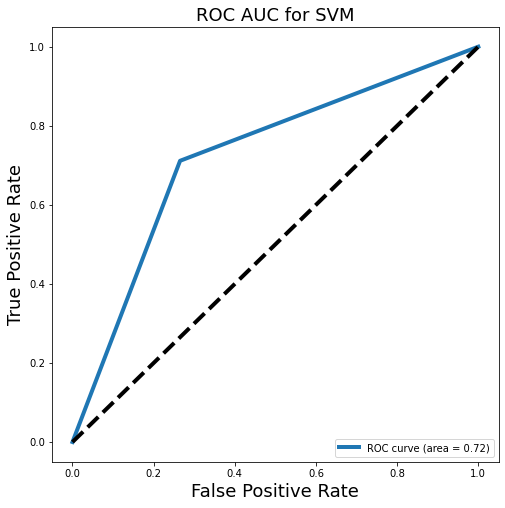

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
svc_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % svc_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for SVM', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.3 Random Forest

In [39]:
%%time

tree_para = {
    'n_estimators': [100, 200, 300],        
    'criterion':['gini','entropy'], 
    'max_depth':np.arange(1, 9), 
    'min_samples_split': np.arange(1, 9)}

gs_rf = GridSearchCV(rf, tree_para, cv = 5, verbose = 1, n_jobs = -1)  
gs_rf.fit(X_train, y_train)

print(gs_rf.best_score_)
print(gs_rf.cv_results_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
0.7235564352654515
{'mean_fit_time': array([0.06249614, 0.12186661, 0.14061632, 0.85083103, 1.94925904,
       2.60584941, 0.94528427, 1.78933372, 3.37031403, 1.3509973 ,
       2.40790038, 3.07085485, 1.06886292, 1.52016182, 2.50696983,
       0.77775707, 1.66343899, 2.58024278, 0.97854352, 1.56820402,
       2.45299087, 1.00857906, 1.67804589, 2.61191907, 0.06716118,
       0.10054274, 0.12472801, 0.96802993, 1.66176767, 2.82831779,
       0.89690289, 1.62829752, 3.07456007, 0.96693854, 1.80131669,
       2.86876545, 1.14397993, 2.1636301 , 3.39430661, 0.95402846,
       1.78917904, 2.59293122, 0.86428957, 1.68242359, 2.62352486,
       0.91200356, 1.82070446, 2.59432354, 0.05476875, 0.0861516 ,
       0.11893191, 0.95388141, 1.75419421, 2.90176415, 1.02580361,
       2.02125726, 2.82356658, 0.92013373, 1.89354258, 3.0220427 ,
       1.03033991, 2.00108156, 3.37838621, 1.3380146 , 2.1504375 ,
       3.48514562, 1.2224863

In [40]:
rf_optimal = gs_rf.best_params_
rf_optimal

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [41]:
# Score of our model
rf_train = round(gs_rf.score(X_train, y_train)*100, 2)
rf_test = round(gs_rf.score(X_test, y_test)*100, 2)

print("Train Score: " + str(rf_train))
print("Test Score: " + str(rf_test))

# Accuracy, recall & f1-scores
y_pred_rf = gs_rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred_rf), 2)
rf_recall = round(recall_score(y_test,y_pred_rf), 2)
rf_f1 = round(f1_score(y_test,y_pred_rf), 2)

print("Accuracy Score: " + str(rf_accuracy))
print("Recall Score: " + str(rf_recall))
print("f1 Score: " + str(rf_f1))

Train Score: 72.5
Test Score: 72.67
Accuracy Score: 0.73
Recall Score: 0.69
f1 Score: 0.71


              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6503
           1       0.74      0.69      0.71      6364

    accuracy                           0.73     12867
   macro avg       0.73      0.73      0.73     12867
weighted avg       0.73      0.73      0.73     12867



Text(33.0, 0.5, 'Actual')

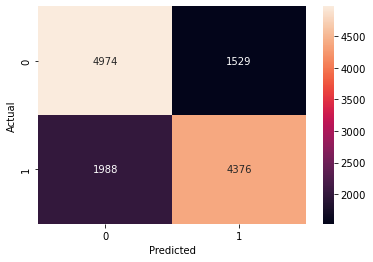

In [42]:
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

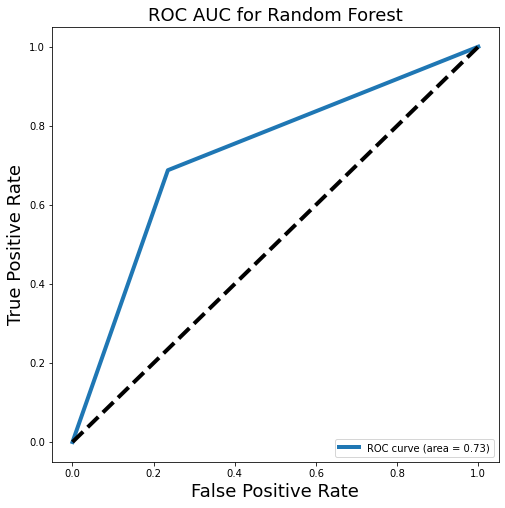

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
rf_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rf_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.4 Tuned XGB

In [44]:
%%time
xgb_grid = {'max_depth':[3, 6, 9],'min_child_weight':[1, 2], 
            'gamma':[0, 0.1, 0.2], 'subsample':[0.5, 1],
           'colsample_bytree':[0.5, 1]}

gs_xgb = GridSearchCV(xgb, xgb_grid, cv = 10, verbose = 1, n_jobs = -1)
gs_xgb.fit(X_train, y_train)

print(gs_xgb.best_score_)
print(gs_xgb.cv_results_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.7226627210534952
{'mean_fit_time': array([1.78956289, 1.26996672, 2.02215376, 1.51550832, 3.49735355,
       2.69228623, 3.27422447, 2.66232867, 4.31774821, 3.54753494,
       4.29108016, 3.3298737 , 2.14641185, 1.58690467, 1.91520717,
       1.32565465, 3.67611766, 2.63615761, 3.68186383, 2.54184425,
       4.7504287 , 4.10267074, 4.97913818, 3.75188859, 1.88393676,
       1.42372065, 1.94399889, 1.23405845, 3.39470148, 2.41508405,
       3.37369659, 2.49983273, 4.15812767, 3.28361177, 4.21635194,
       3.2449789 , 2.57537203, 1.67568111, 2.36997077, 1.85455072,
       4.95364277, 3.56388047, 4.99897316, 3.44895401, 7.94523578,
       5.6847919 , 7.79385419, 5.61907899, 2.47087998, 1.673611  ,
       2.5730232 , 1.7561322 , 5.13560748, 3.44547148, 4.96895237,
       3.57235637, 7.84805412, 5.83901684, 8.02205136, 6.96882792,
       2.46085162, 1.81806831, 2.40210679, 1.74519529, 5.06736951,
       3.60791757, 4.93735726

In [45]:
xgb_optimal = gs_xgb.best_params_
xgb_optimal

{'colsample_bytree': 1,
 'gamma': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.5}

In [46]:
# Score of our model
xgb_train = round(gs_xgb.score(X_train, y_train)*100, 2)
xgb_test = round(gs_xgb.score(X_test, y_test)*100, 2)

print("Train Score: " + str(xgb_train))
print("Test Score: " + str(xgb_test))

# Accuracy, recall & f1-scores
y_pred_xgb = gs_xgb.predict(X_test)
xgb_accuracy = round(accuracy_score(y_test,y_pred_xgb), 2)
xgb_recall = round(recall_score(y_test,y_pred_xgb), 2)
xgb_f1 = round(f1_score(y_test,y_pred_xgb), 2)

print("Accuracy Score: " + str(xgb_accuracy))
print("Recall Score: " + str(xgb_recall))
print("f1 Score: " + str(xgb_f1))

Train Score: 72.35
Test Score: 72.57
Accuracy Score: 0.73
Recall Score: 0.71
f1 Score: 0.72


              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6503
           1       0.73      0.71      0.72      6364

    accuracy                           0.73     12867
   macro avg       0.73      0.73      0.73     12867
weighted avg       0.73      0.73      0.73     12867



Text(33.0, 0.5, 'Actual')

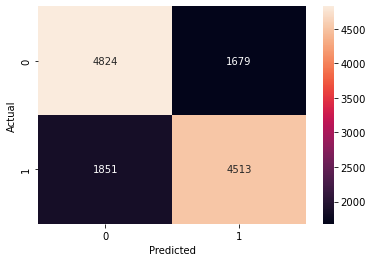

In [47]:
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

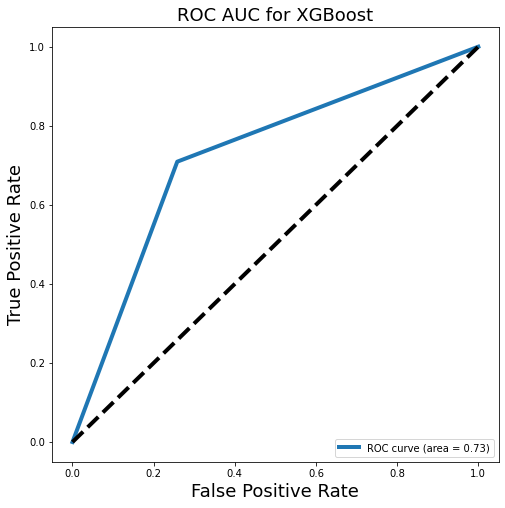

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
xgb_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % xgb_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for XGBoost', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## 6. Results of our Tuned Model

In [49]:
tuned_model_data = pd.DataFrame({'Model':['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'], 
                          'Tuned Train Score':[lr_train, svc_train, rf_train, xgb_train], 
                          'Tuned Test Score':[lr_test, svc_test, rf_test, xgb_test], 
                                'Tuned Recall':[lr_recall, svc_recall, rf_recall, xgb_recall],
                                'Tuned f1-score':[lr_f1, svc_f1, rf_f1, xgb_f1], 
                                'Tuned ROC AUC':[lr_roc_auc, svc_roc_auc, rf_roc_auc, xgb_roc_auc]})
tuned_model_data

,Model,Tuned Train Score,Tuned Test Score,Tuned Recall,Tuned f1-score,Tuned ROC AUC
0,Logistic Regression,71.94,72.39,0.67,0.71,0.723295
1,SVM,73.23,72.32,0.71,0.72,0.723118
2,Random Forest,72.50,72.67,0.69,0.71,0.726248
3,XGBoost,72.35,72.57,0.71,0.72,0.725478


### 6.1 Comparing the results for Initial and Tuned Models

In [50]:
final_score = model_data.merge(tuned_model_data, on = 'Model')
final_score

,Model,Train Score,Test Score,Recall,f1-score,ROC AUC,Tuned Train Score,Tuned Test Score,Tuned Recall,Tuned f1-score,Tuned ROC AUC
0,Logistic Regression,71.94,72.39,0.67,0.71,0.723295,71.94,72.39,0.67,0.71,0.723295
1,SVM,71.91,72.53,0.67,0.71,0.724790,73.23,72.32,0.71,0.72,0.723118
2,Random Forest,73.23,72.16,0.71,0.72,0.721494,72.50,72.67,0.69,0.71,0.726248
3,XGBoost,72.82,72.36,0.72,0.72,0.723488,72.35,72.57,0.71,0.72,0.725478


In [52]:
final_score.nlargest(3, ['Tuned Recall', 'Tuned Test Score', 'f1-score'])

,Model,Train Score,Test Score,Recall,f1-score,ROC AUC,Tuned Train Score,Tuned Test Score,Tuned Recall,Tuned f1-score,Tuned ROC AUC
3,XGBoost,72.82,72.36,0.72,0.72,0.723488,72.35,72.57,0.71,0.72,0.725478
1,SVM,71.91,72.53,0.67,0.71,0.724790,73.23,72.32,0.71,0.72,0.723118
2,Random Forest,73.23,72.16,0.71,0.72,0.721494,72.50,72.67,0.69,0.71,0.726248


## 7. Conclusion  

### 7.1 Objectives:  

1) Determine the patient profile of those with and without a cardiovascular disease by looking at their lifestyle choices and/or risk factors.  

- <strong>Age</strong>: Generally, across all variables, individuals around the age of 55 years old tend to have a cardiovascular disease irregardless of lifestyle choices and/or risk factors.  


- <strong>BMI</strong>: With respect to all other variables, individuals with higher BMI tend to have cardiovascular disease. When compared to the target variable, **higher** BMI also showed **higher** likelihood of having cardiovascular disease.  


- <strong>Cholesterol</strong>: Noticeable difference were observed between individuals with and without cardiovascular disease.  

    - Count of individuals with normal cholesterol levels are **lesser** in diseased group.  
    - Count of individuals with above normal cholesterol levels are **more** in diseased group.  
    - Count of individuals with way above cholesterol levels are **more** in diseased group.  
    

- <strong>Glucose</strong>: Slight difference observed between individuals with and without cardiovascular disease.  

    - Count of individuals with normal glucose levels are **lesser** in diseased group.  
    - Count of individuals with above normal glucose levels are **more** in diseased group.  
    - Count of individuals with way above glucose levels are **more** in diseased group.  
    

- <strong>Activity</strong> Slight difference observed between individuals with and without cardiovascular disease.  

    - Count of individuals who are active are **lesser** in diseased group.  
    - Count of individuals who are not active are **more** in diseased group.  
    

- All other variables showed **little/negligible** difference between individuals with and without cardiovascular disease.  

2) Create a model that would be able to predict whether an individual has a cardiovascular disease or not.  
- <strong>XGBoost</strong> is the best model out of all for the prediction of cardiovascular disease.  

    - Recall is the more important metric for this project. XGBoost had the best at 0.72 without any hyperparameter tuning  
    - Has an accuracy of 0.73  
    - Has an ROC AUC of 0.73  
    - Looking at the f1 scores, XGBoost scored 0.72  


### 7.2 Next Steps: 

1) Tuning the hyperparameters did little to no improvement across all metrics used.  
    - Better refinement of this process needs to be done.  
    
2) Reduce the number of features using techniques like PCA or SelectKBest, and only take in the best features to run in our models.  

3) Additional data could be included.  
    - Currently, only individuals's lifestyle choices and risk factors were provided. Presence of co-morbidities like diabetes or stroke could be included so that it can be fed into our models to get better results.  